In [ ]:
# Алексеев Д.П. (DSU-4, STPY-21)
# Домашнее задание к лекции «Задачи классификации и кластеризации» (#5)

# 1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
# 2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
# 3.Разделите данные на выборку для обучения и тестирования
# 4.Постройте модель LDA
# 5.Визуализируйте предсказания для тестовой выборки и центры классов
# 6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# 7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
# 1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris
iris = load_iris()

In [40]:
# 2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data = pd.DataFrame(iris.data, columns=iris.feature_names).filter(['sepal length (cm)', 'sepal width (cm)'])
data_class = iris.target
data['variety'] = pd.DataFrame(data_class)[0]
data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [48]:
# 3.Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [49]:
# 4.Постройте модель LDA
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
lda = LinearDiscriminantAnalysis()

In [51]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0])

In [53]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,2,2
2,0,0
3,0,0
4,2,1
5,0,0
6,1,2
7,1,1
8,2,2
9,0,1


In [54]:
# расчет метрики качества accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

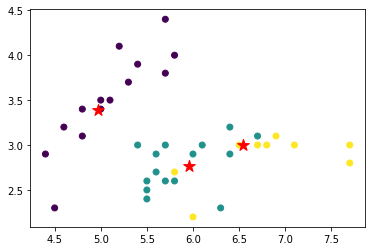

In [55]:
# 5.Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды (центры классов):
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

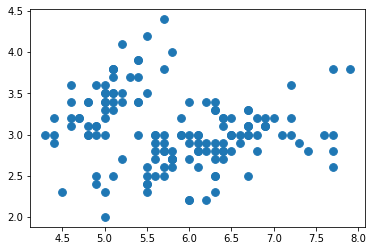

In [56]:
# 6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
data2 = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
plt.scatter(data2['sepal length (cm)'], data2['sepal width (cm)'], cmap='autumn', s=60)

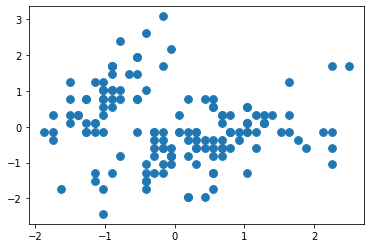

In [71]:
# из построенной scatter plot видно, что у признаков немного разные масштабы, что логично - длина больше ширины
# ('sepal length (cm)' от 4.5 до 8.0 см; 'sepal width (cm)' от 2.0 до 4.5 см).

# Поэтому попробуем привести данные к единому масштабу с помощью StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [60]:
# 7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

# Из предыдущей scatter plot видно, что после приведения к единому масштабу по сути ничего не изменилось.
# Поэтому смело можно анализировать полученную визуализацию. => Наблюдаются 2 чётко выраженных кластера.
# Но мы знаем, что по условию задачи цветки делятся на 3 класса, а не на два=) Это Setosa, Virginica и Versicolor.
# Поэтому попробуем улучшить(детализировать) кластеризацию, начнём с построения "графика локтя".

# сперва импортируем библиотеку алгоритма К-среднего
from sklearn.cluster import KMeans

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)


C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


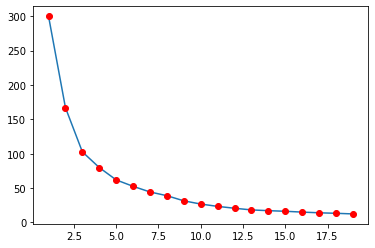

In [61]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [62]:
# из построенного "графика локтя" можно сделать вывод, что оптимальное число кластеров - это 3 или 4.
#  Остановимся на трёх.

# указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# обучаем модель
clusters = kmeans.fit_predict(data2)

In [63]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

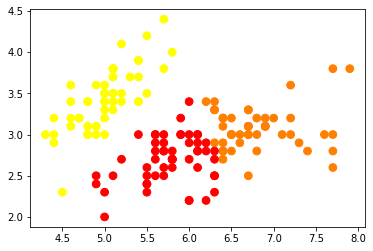

In [72]:
# строим визуализацию полученной кластеризации
plt.scatter(data2['sepal length (cm)'], data2['sepal width (cm)'], cmap='autumn', c=clusters, s=60)